           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

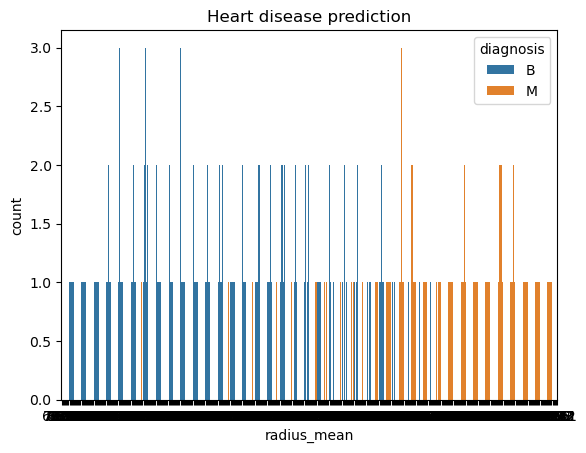

C:\Users\alimt\AppData\Local\Temp\ipykernel_4524\795472839.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"M":1,"B":0},inplace=True)


mae_test: 0.05813953488372093
mse_test: 0.05813953488372093
mae_val: 0.07058823529411765
mse_val: 0.07058823529411765
rmse_test: 0.24112141108520604
rmse_val: 0.2656844656620286
accuracy_test: 94.18604651162791
accuracy_val: 92.94117647058823
Conf_mat_test: [[57  3]
 [ 2 24]]
Conf_mat_val: [[44  4]
 [ 2 35]]
Precison_test: 0.8888888888888888
recall_test: 0.9230769230769231
f1_test: 0.9056603773584906


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
#A model that analyzes the Spreadness of breast cancer illness
df=pd.read_csv("data.csv")
print(df)
print("Columns of data:",df.columns)
print("The number of nulls in data:",df.isnull().sum())
print("Data description:",df.describe())
sns.countplot(x="radius_mean",hue="diagnosis",data=df)
plt.title("Heart disease prediction")
plt.show()
# Tree model evaluation
df.replace({"M":1,"B":0},inplace=True)
x=df.drop(["diagnosis","id","Unnamed: 32"],axis=1)
y=df["diagnosis"]
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.3,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
y_pred_test=tree_model.predict(x_test)
y_pred_val=tree_model.predict(x_val)
mae_test=mean_absolute_error(y_test,y_pred_test)
mse_test=mean_squared_error(y_test,y_pred_test)
print("mae_test:",mae_test)
print("mse_test:",mse_test)
mae_val=mean_absolute_error(y_val,y_pred_val)
mse_val=mean_squared_error(y_val,y_pred_val)
print("mae_val:",mae_val)
print("mse_val:",mse_val)
rmse_test=mse_test**0.5
rmse_val=mse_val**0.5
print("rmse_test:",rmse_test)
print("rmse_val:",rmse_val)
accuracy_test=accuracy_score(y_test,y_pred_test)
accuracy_val=accuracy_score(y_val,y_pred_val)
print("accuracy_test:",accuracy_test*100)
print("accuracy_val:",accuracy_val*100)
conf_mat_val=confusion_matrix(y_val,y_pred_val)
conf_mat_test=confusion_matrix(y_test,y_pred_test)
print("Conf_mat_test:",conf_mat_test)
print("Conf_mat_val:",conf_mat_val)
precision_test=precision_score(y_test,y_pred_test)
recall_test=recall_score(y_test,y_pred_test)
f1_test=f1_score(y_test,y_pred_test)
print("Precison_test:",precision_test)
print("recall_test:",recall_test)
print("f1_test:",f1_test)